<a href="https://colab.research.google.com/github/kerenalli/Neural-Nets/blob/main/Perceptron_MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

TensorFlow is a software library extensively used in machine learning

In [1]:
%tensorflow_version 2.x
import tensorflow as tf

# Download and import the MIT 6.S191 package
!pip install mitdeeplearning
import mitdeeplearning as mdl

import numpy as np
import matplotlib.pyplot as plt

     |████████████████████████████████| 2.1MB 6.0MB/s 
  Created wheel for mitdeeplearning: filename=mitdeeplearning-0.2.0-cp37-none-any.whl size=2115442 sha256=d0b45fb38f53d27ac23c1cb3d70e4d7331c714fd9393606e1bc7fd4b4b0bb7df
  Stored in directory: /root/.cache/pip/wheels/af/dc/2a/5c3633135e7e4ef4fd31463cfa1942cb1bae7486ab94e7a2ad
Successfully built mitdeeplearning


Tensors are data structures that you can think of as multi-dimensional arrays. Tensors are represented as n-dimensional arrays of base dataypes such as a string or integer -- they provide a way to generalize vectors and matrices to higher dimensions.

The **shape** of a Tensor defines **its number of dimensions and the size of each dimension**. The **rank** of a Tensor provides the **number of dimensions** (n-dimensions) -- you can also think of this as the Tensor's order or degree.

In [2]:
sport = tf.constant("Tennis", tf.string)
number = tf.constant(1.41421356237, tf.float64)

print("`sport` is a {}-d Tensor".format(tf.rank(sport).numpy()))
print("`number` is a {}-d Tensor".format(tf.rank(number).numpy()))

`sport` is a 0-d Tensor
`number` is a 0-d Tensor


In the above output, 0-D tensor is just a number or **scalar**. **Vectors** and **lists** can be used to create 1-d Tensors

In [3]:
sports = tf.constant(["Tennis", "Basketball"], tf.string)
numbers = tf.constant([3.141592, 1.414213, 2.71821], tf.float64)

print("`sports` is a {}-d Tensor with shape: {}".format(tf.rank(sports).numpy(), tf.shape(sports)))
print("`numbers` is a {}-d Tensor with shape: {}".format(tf.rank(numbers).numpy(), tf.shape(numbers)))

`sports` is a 1-d Tensor with shape: [2]
`numbers` is a 1-d Tensor with shape: [3]


In [7]:
sports = tf.constant([["Tennis", "Basketball"],["Tennis", "Basketball"]], tf.string)
numbers = tf.constant([[3.141592, 1.414213],[3.141592, 2.71821]], tf.float64)

print("`sports` is a {}-d Tensor with shape: {}".format(tf.rank(sports).numpy(), tf.shape(sports)))
print("`numbers` is a {}-d Tensor with shape: {}".format(tf.rank(numbers).numpy(), tf.shape(numbers)))

`sports` is a 2-d Tensor with shape: [2 2]
`numbers` is a 2-d Tensor with shape: [2 2]


In [9]:
### Defining higher-order Tensors ###
'''TODO: Define a 2-d Tensor'''
matrix =tf.constant([["Tennis", "Basketball"],
                     ["Tennis", "Basketball"]], tf.string) # TODO

assert isinstance(matrix, tf.Tensor), "matrix must be a tf Tensor object"
assert tf.rank(matrix).numpy() == 2
print(matrix)

tf.Tensor(
[[b'Tennis' b'Basketball']
 [b'Tennis' b'Basketball']], shape=(2, 2), dtype=string)


In [22]:
matrix1=tf.constant([[[1,2],[3,4]],[[1,2],[3,4]]])
#here the matrix is 2x2x2
row_vector = matrix1[1,1]
column_vector = matrix1[0,0]
scalar = matrix1[[1, 1,1]]
#in this example we are printing the row vector of the matrix
print("The matrix is:")
print(matrix1)
print("`\nrow_vector is`: {}".format(row_vector.numpy()))
print("\n`column_vector is`: {}".format(column_vector.numpy()))
print("`\nscalar`: {}".format(scalar.numpy()))

The matrix is:
tf.Tensor(
[[[1 2]
  [3 4]]

 [[1 2]
  [3 4]]], shape=(2, 2, 2), dtype=int32)
`
row_vector is`: [3 4]

`column_vector is`: [1 2]
`
scalar`: 4


# **1.2 Computations on Tensors**

A convenient way to think about and visualize computations in TensorFlow is in terms of **graphs**. We can define this graph in terms of Tensors, which hold data, and the mathematical operations that act on these Tensors in **some order**. Let's look at a simple example, and define this computation using TensorFlow:

In [25]:
# Create the nodes in the graph, and initialize values
a = tf.constant(15)
b = tf.constant(61)

# Add them!
c1 = tf.add(a,b)
c2 = a + b # TensorFlow overrides the "+" operation so that it is able to act on Tensors
print(a)
print("\n")
print(b)
print("\n")
print(c1)
print("\n")
print(c2)

tf.Tensor(15, shape=(), dtype=int32)


tf.Tensor(61, shape=(), dtype=int32)


tf.Tensor(76, shape=(), dtype=int32)


tf.Tensor(76, shape=(), dtype=int32)


In [30]:
### Defining Tensor computations ###
# Create the nodes in the graph, and initialize values
#a = tf.constant(15)
#b = tf.constant(61)
# Construct a simple computation function
def func(a,b):
  '''TODO: Define the operation for c, d, e (use tf.add, tf.subtract, tf.multiply).'''
  c = a+b# TODO
  print("\nValue of c is")
  print(c)
  d =b-1 # TODO
  print("\nValue of d is")
  print(d)
  e =c*d # TODO
  return e


# Consider example values for a,b
a, b = 5,6
# Execute the computation
e_out = func(a,b)
print("\nFinal Value is")
print(e_out)


Value of c is
11

Value of d is
5

Final Value is
55


# **1.3 Neural networks in TensorFlow**

We can also define neural networks in TensorFlow. TensorFlow uses a high-level API called Keras that provides a powerful, intuitive framework for building and training deep learning models.

Let's first consider the example of a simple perceptron defined by just one dense layer: $ y = \sigma(Wx + b)$, where $W$ represents a matrix of weights, $b$ is a bias, $x$ is the input, $\sigma$ is the sigmoid activation function, and $y$ is the output. We can also visualize this operation using a graph:

In [36]:
### Defining a network Layer ###

# n_output_nodes: number of output nodes
# input_shape: shape of the input
# x: input to the layer

class OurDenseLayer(tf.keras.layers.Layer):
  def __init__(self, n_output_nodes):
    super(OurDenseLayer, self).__init__()
    self.n_output_nodes = n_output_nodes

  def build(self, input_shape):
    d = int(input_shape[-1])
    # Define and initialize parameters: a weight matrix W and bias b
    # Note that parameter initialization is random!
    self.W = self.add_weight("weight", shape=[d, self.n_output_nodes]) # note the dimensionality
    print("\nThe weight matrix is: \n")
    print(self.W)
    self.b = self.add_weight("bias", shape=[1, self.n_output_nodes]) # note the dimensionality
    print("\nThe Bias is: \n")
    print(self.b)

  def call(self, x):
    '''TODO: define the operation for z (hint: use tf.matmul)'''
    z = tf.matmul(x,self.W)+self.b # TODO
    print("\nThe calculated z is: \n")
    print(z)

    '''TODO: define the operation for out (hint: use tf.sigmoid)'''
    y =tf.sigmoid(z) # TODO
    print("\nThe calculated y is: \n")
    print(y)
    return y

# Since layer parameters are initialized randomly, we will set a random seed for reproducibility
tf.random.set_seed(1)
#here we have 1 output node
layer = OurDenseLayer(3)
layer.build((1,2))
x_input = tf.constant([[1,2.]], shape=(1,2))
y = layer.call(x_input)

# test the output!
print(y.numpy())
mdl.lab1.test_custom_dense_layer_output(y)



The weight matrix is: 

<tf.Variable 'weight:0' shape=(2, 3) dtype=float32, numpy=
array([[-0.73366153,  0.8796015 ,  0.28695   ],
       [-0.14340228, -0.4558388 ,  0.3122064 ]], dtype=float32)>

The Bias is: 

<tf.Variable 'bias:0' shape=(1, 3) dtype=float32, numpy=array([[ 0.02475715, -0.13831842, -0.2240473 ]], dtype=float32)>

The calculated z is: 

tf.Tensor([[-0.99570894 -0.17039454  0.68731546]], shape=(1, 3), dtype=float32)

The calculated y is: 

tf.Tensor([[0.26978594 0.45750415 0.66536945]], shape=(1, 3), dtype=float32)
[[0.26978594 0.45750415 0.66536945]]
[PASS] test_custom_dense_layer_output


True

Conveniently, TensorFlow has defined a number of Layers that are commonly used in neural networks, for example a Dense. Now, instead of using a single Layer to define our simple neural network, we'll use the Sequential model from Keras and a single Dense layer to define our network. With the Sequential API, you can readily create neural networks by stacking together layers like building blocks.

# **Keras Sequential Models**

# **1. Perceptron**

The Sequential model API is a way of creating deep learning models where an instance of the Sequential class is created and model layers are created and added to it. The layers can be defined and passed to the Sequential as an **array**.
###from keras.models import Sequential
###from keras.layers import Dense
###model = Sequential([Dense(2, input_dim=1), Dense(1)])*.

# **The Layers can also be added piecewise**
###from keras.models import Sequential

###from keras.layers import Dense

###model = Sequential([Dense(2, input_dim=1), Dense(1)])

Models are defined by creating instances of layers and connecting them directly to each other in pairs, then defining a Model that specifies the layers to act as the input and output to the model.

1.Defining Input
2.Connecting Layers
3.Creating the Model




Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 2)]               0         
_________________________________________________________________
dense_10 (Dense)             (None, 2)                 6         
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 3         
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________
None


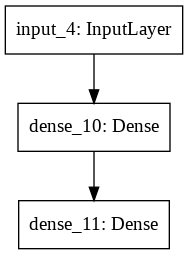

In [40]:
# Simple Perceptron
from keras.utils import plot_model
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
#When input data is one-dimensional, such as for a multilayer Perceptron, 
#the shape must explicitly leave room for the shape of the mini-batch size used 
#when splitting the data when training the network. Therefore, 
#the shape tuple is always defined with a hanging last dimension when the input is one-dimensional (2,), for example:
visible = Input(shape=(2,))

'''The layers in the model are connected pairwise.
This is done by specifying where the input comes from when defining each new layer.
A bracket notation is used, such that after the layer is created, 
the layer from which the input to the current layer comes from is specified.'''

hidden1 = Dense(2, activation='relu')(visible)
output = Dense(1, activation='sigmoid')(hidden1)

'''Keras provides a Model class that you can use to create a model from your 
created layers. It requires that you only specify the input and output layers. For example:'''

model1 = Model(inputs=visible, outputs=output)

# summarize layers
print(model1.summary())

# plot graph
plot_model(model1, to_file='multilayer_perceptron_graph.png')



In [46]:
# first neural network with keras tutorial
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense
# load the dataset
dataset = loadtxt('/content/pima-indians-diabetes.csv', delimiter=',')
# split into input (X) and output (y) variables
X = dataset[:,0:8]
y = dataset[:,8]
# define the keras model
model = Sequential()
model.add(Dense(8, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

print(model.summary())
plot_model(model, to_file='perceptron_graph.png')

# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# fit the keras model on the dataset
model.fit(X, y, epochs=150, batch_size=10)
# evaluate the keras model
_, accuracy = model.evaluate(X, y)
print('Accuracy: %.2f' % (accuracy*100))

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 8)                 72        
_________________________________________________________________
dense_16 (Dense)             (None, 8)                 72        
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 9         
Total params: 153
Trainable params: 153
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/150
77/77 [==============================] - 1s 1ms/step - loss: 10.1038 - accuracy: 0.3301
Epoch 2/150
77/77 [==============================] - 0s 1ms/step - loss: 2.5474 - accuracy: 0.3772
Epoch 3/150
77/77 [==============================] - 0s 1ms/step - loss: 1.1246 - accuracy: 0.5562
Epoch 4/150
77/77 [==============================] - 0s 1ms/step - loss: 0.8711 - a

# ***2. Multi layer perceptron***

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 10)]              0         
_________________________________________________________________
dense_25 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_26 (Dense)             (None, 20)                220       
_________________________________________________________________
dense_27 (Dense)             (None, 30)                630       
_________________________________________________________________
dense_28 (Dense)             (None, 20)                620       
_________________________________________________________________
dense_29 (Dense)             (None, 10)                210       
_________________________________________________________________
dense_30 (Dense)             (None, 1)                 11  

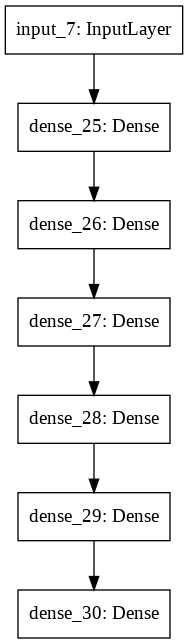

In [49]:
# Multilayer Perceptron
from keras.utils import plot_model
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
#When input data is one-dimensional, such as for a multilayer Perceptron, 
#the shape must explicitly leave room for the shape of the mini-batch size used 
#when splitting the data when training the network. Therefore, 
#the shape tuple is always defined with a hanging last dimension when the input is one-dimensional (2,), for example:
visible = Input(shape=(10,))

'''The layers in the model are connected pairwise.
This is done by specifying where the input comes from when defining each new layer.
A bracket notation is used, such that after the layer is created, 
the layer from which the input to the current layer comes from is specified.'''

hidden1 = Dense(10, activation='relu')(visible)
hidden2 = Dense(20, activation='relu')(hidden1)
hidden3 = Dense(30, activation='relu')(hidden2)
hidden4 = Dense(20, activation='relu')(hidden3)
hidden5 = Dense(10, activation='relu')(hidden4)
output = Dense(1, activation='sigmoid')(hidden5)

'''Keras provides a Model class that you can use to create a model from your 
created layers. It requires that you only specify the input and output layers. For example:'''

model = Model(inputs=visible, outputs=output)

# summarize layers
print(model.summary())

# plot graph
plot_model(model, to_file='multilayer_perceptron_graph.png')

# **3. Using the model**

In [56]:
# first neural network with keras tutorial
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense
# load the dataset
dataset = loadtxt('/content/pima-indians-diabetes.csv', delimiter=',')
# split into input (X) and output (y) variables
X = dataset[:,0:8]
y = dataset[:,8]
# define the keras model
model = Sequential()
model.add(Dense(8, input_dim=8, activation='relu'))
model.add(Dense(16, input_dim=8, activation='relu'))
model.add(Dense(32, input_dim=8, activation='relu'))
model.add(Dense(32, input_dim=8, activation='relu'))
model.add(Dense(64, input_dim=8, activation='relu'))
#model.add(Dense(128, input_dim=8, activation='relu'))
#model.add(Dense(256, input_dim=8, activation='relu'))
#model.add(Dense(512, input_dim=8, activation='relu'))
#model.add(Dense(256, input_dim=8, activation='relu'))
#model.add(Dense(128, input_dim=8, activation='relu'))
#model.add(Dense(64, input_dim=8, activation='relu'))
model.add(Dense(32, input_dim=8, activation='relu'))
model.add(Dense(16, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

print(model.summary())
plot_model(model, to_file='perceptron_graph.png')

# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# fit the keras model on the dataset
model.fit(X, y, epochs=150, batch_size=10)
# evaluate the keras model
_, accuracy = model.evaluate(X, y)
print('Accuracy: %.2f' % (accuracy*100))

ValueError: ignored